In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
#Importing dataset
data = pd.read_csv("C://Users/Elliot/Downloads/ONLINE COURSES/ELEVOO INTERNSHIP/Data/loan_approval_dataset.csv")

In [3]:
# Displays dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
#Gives the structure of the data
data.info()
# Tells you the number of missing values in the data
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

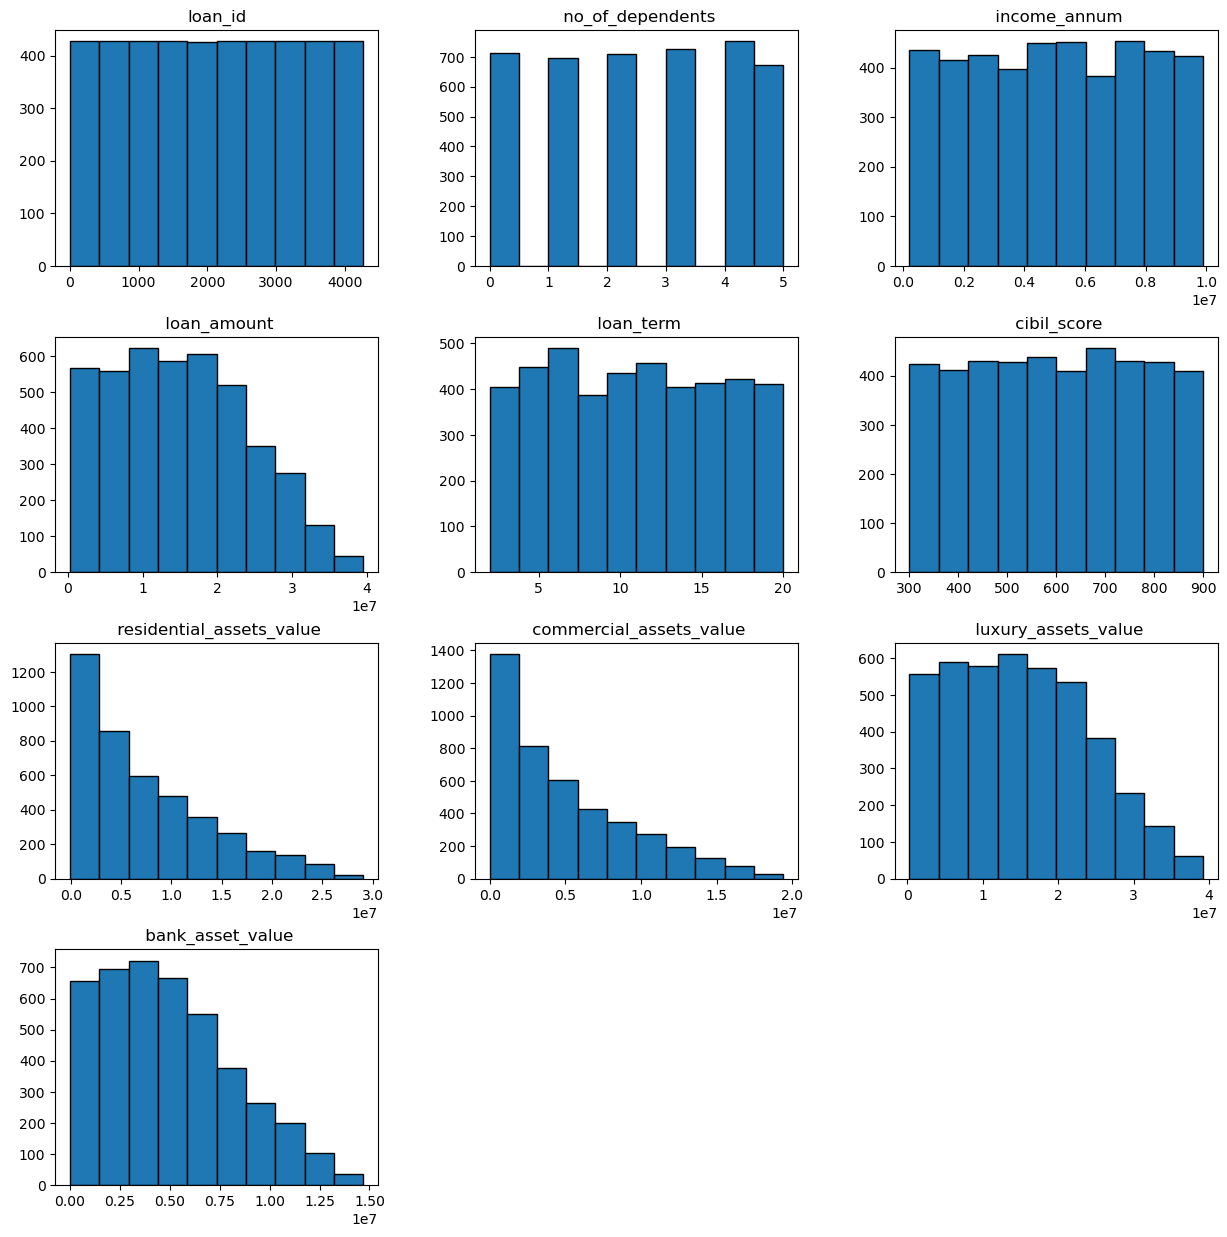

In [5]:
data.hist(figsize = (15,15), grid = False, edgecolor = "black")
plt.show()

In [6]:
# Separates categorical and numerical variables
cat = data.select_dtypes(include=["object"]).columns
num = data.select_dtypes(include=[np.number]).columns

In [7]:
# Fixing the missing values in the categorical variables with mode
cat1 = SimpleImputer(strategy="most_frequent")
data[cat] = cat1.fit_transform(data[cat])

In [8]:
# Fixing the missing values in the numeric variables with median
num1 = SimpleImputer(strategy="median")
data[num] = num1.fit_transform(data[num])

In [9]:
encoder = LabelEncoder()
for i in cat:
    data[i] = encoder.fit_transform(data[i])

In [10]:
x = data.drop([" loan_status"], axis=1)  
y = data[" loan_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [12]:
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_res.value_counts())

Class distribution before SMOTE:
  loan_status
0    2125
1    1290
Name: count, dtype: int64
Class distribution after SMOTE:
  loan_status
1    2125
0    2125
Name: count, dtype: int64


In [13]:
# Model with the smote dataset
c = RandomForestClassifier(random_state=42, n_estimators=200, class_weight="balanced")
c.fit(x_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [14]:
# Model without the smote dataset
c1 = RandomForestClassifier(random_state=42, n_estimators=200)
c1.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
# Predicted y-values
y_pred = c.predict(x_test)
y_pred1 = c1.predict(x_test)

In [16]:
# Evaluation Metrics for the Model with the smote dataset
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)
print("F1 Score:", f1_score(y_test, y_pred) * 100)

Accuracy: 97.7751756440281
Precision: 97.79874213836479
Recall: 96.28482972136223
F1 Score: 97.03588143525741


In [17]:
# Evaluation Metrics for the Model without the smote dataset
print("Accuracy:", accuracy_score(y_test, y_pred1) * 100)
print("Precision:", precision_score(y_test, y_pred1) * 100)
print("Recall:", recall_score(y_test, y_pred1) * 100)
print("F1 Score:", f1_score(y_test, y_pred1) * 100)

Accuracy: 98.00936768149883
Precision: 98.72611464968153
Recall: 95.97523219814241
F1 Score: 97.33124018838305


In [18]:
# Classification Report for the Model with the smote dataset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [19]:
# Classification Report for the Model without the smote dataset
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.99      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [20]:
# Confusion Matrix for the Model with the smote dataset
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print(cm_df)

          Predicted 0  Predicted 1
Actual 0          524            7
Actual 1           12          311


In [21]:
# Confusion Matrix for the Model without the smote dataset
cm1 = confusion_matrix(y_test, y_pred1, labels=[0,1])
cm_df1 = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print(cm_df1)

          Predicted 0  Predicted 1
Actual 0          524            7
Actual 1           12          311
